# <u>Using Deep Features to Train an Image Classifier</u>

In [48]:
import turicreate

# <u>Load data</u>

In [49]:
image_train = turicreate.SFrame('image_train_data/')
image_test = turicreate.SFrame('image_test_data/')

# <u>Explore Image Data</u>

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/turicreate/visualization/_plot.py:461: UserWarning: Displaying only the first 100 rows.
  warnings.warn("Displaying only the first {} rows.".format(maximum_rows))


,SArray
0,
1,
2,
3,
4,
5,
6,
7,
8,
9,

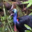
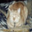
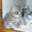
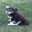
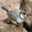
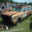
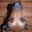
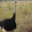
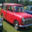
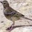
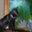
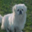
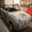
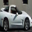
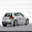
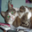
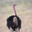
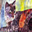
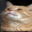
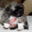
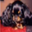
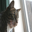
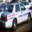
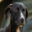
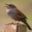
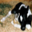
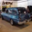
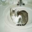
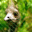
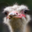
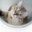
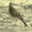
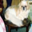
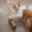
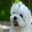
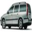
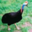
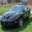
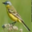
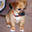
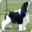
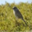
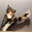
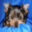
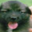
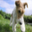
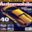
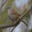
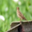
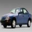
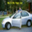
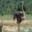
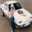
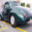
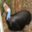
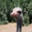
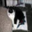
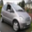
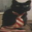
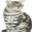
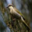
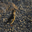
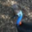
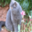
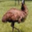
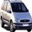
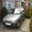
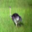
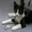
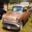
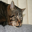
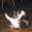
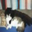
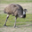
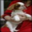
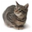
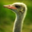
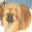
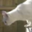
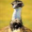
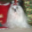
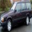
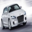
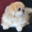
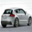
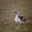
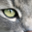
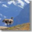
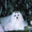
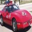
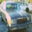
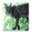
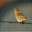
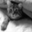
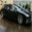
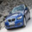
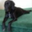
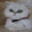
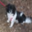
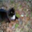

In [50]:
image_train['image'].explore()

# <u>Train an Image Classifier on Raw Image Pixels</u>

In [51]:
raw_pixel_model = turicreate.logistic_classifier.create(image_train,
                                                       target = 'label',
                                                       features = ['image_array'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 1904

Number of classes           : 4

Number of feature columns   : 1

Number of unpacked features : 3072

Number of coefficients      : 9219

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 5        | 0.016827  | 0.236711     | 0.271008          | 0.237624            |

| 1         | 11       | 5.738086  | 0.446377     | 0.400735          | 0.396040            |

| 2         | 12       | 5.738086  | 0.517016     | 0.319853          | 0.297030            |

| 3         | 14       | 0.788208  | 0.716210     | 0.426996          | 0.475248            |

| 4         | 15       | 0.985260  | 0.807348     | 0.448529          | 0.445545            |

| 9         | 25       | 0.728144  | 1.429222     | 0.525210          | 0.534653            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

# <u>Make predictions using simple raw pixel model</u>

,SArray
0,
1,
2,

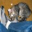
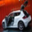
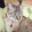

In [52]:
image_test[0:3]['image'].explore()

In [53]:
image_test[0:3]['label']

dtype: str
Rows: 3
['cat', 'automobile', 'cat']

In [54]:
raw_pixel_model.predict(image_test[0:3])

dtype: str
Rows: 3
['bird', 'cat', 'bird']

# <u>Evaluate the raw pixel model on the test data</u>

In [55]:
raw_pixel_model.evaluate(image_test)

{'accuracy': 0.47875,
 'auc': 0.7275915833333333,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 16
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |     bird     |       dog       |  183  |
 |     dog      |       cat       |  197  |
 |     bird     |    automobile   |  140  |
 |  automobile  |    automobile   |  646  |
 |     cat      |       dog       |  325  |
 |     dog      |       dog       |  439  |
 |     dog      |    automobile   |  117  |
 |     bird     |       bird      |  533  |
 |  automobile  |       bird      |  113  |
 |     bird     |       cat       |  144  |
 +--------------+-----------------+-------+
 [16 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.,
 'f1_score': 0.4732393989170201,
 'log_loss': 1.1994593105341385,
 'precisio

# <u>Train Image Classifier using Deep Features</u>

In [56]:
len(image_train)

2005

In [57]:
#deep_learning_model = turicreate.load_model('imagenet_model_iter45')
#image_train['deep_features'] = deep_learning_model.extract_features(image_train)

In [58]:
image_train

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.24287176132202148,1.0954537391662598, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
33,Height: 32 Width: 32,cat,"[0.5250879526138306, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.5660159587860107, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."
70,Height: 32 Width: 32,dog,"[1.129795789718628, 0.0,0.0, 0.7781944870948792, ...","[154.0, 179.0, 152.0,159.0, 183.0, 157.0, ..."
90,Height: 32 Width: 32,bird,"[1.7178692817687988, 0.0,0.0, 0.0, 0.0, 0.0, ...","[216.0, 195.0, 180.0,201.0, 178.0, 160.0, ..."
97,Height: 32 Width: 32,automobile,"[1.5781855583190918, 0.0,0.0, 0.0, 0.0, 0.0, ...","[33.0, 44.0, 27.0, 29.0,44.0, 31.0, 32.0, 45.0, ..."
107,Height: 32 Width: 32,dog,"[0.0, 0.0,0.22067785263061523, ...","[97.0, 51.0, 31.0, 104.0,58.0, 38.0, 107.0, 61.0, ..."
121,Height: 32 Width: 32,bird,"[0.0,0.23753464221954346, ...","[93.0, 96.0, 88.0, 102.0,106.0, 97.0, 117.0, ..."
136,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 7.57378625869751, ...","[35.0, 59.0, 53.0, 36.0,56.0, 56.0, 42.0, 62.0, ..."
138,Height: 32 Width: 32,bird,"[0.6589357256889343, 0.0,0.0, 0.0, 0.0, 0.0, ...","[205.0, 193.0, 195.0,200.0, 187.0, 193.0, ..."


# <u>Train a Logistic Classifier</u>

In [59]:
deep_features_model = turicreate.logistic_classifier.create(image_train,
                                                           target='label',
                                                           features = ['deep_features'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 1904

Number of classes           : 4

Number of feature columns   : 1

Number of unpacked features : 4096

Number of coefficients      : 12291

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 3        | 0.500000  | 0.178098     | 0.758403          | 0.742574            |

| 1         | 6        | 0.250000  | 0.428472     | 0.763655          | 0.732673            |

| 2         | 9        | 0.188695  | 0.752151     | 0.772059          | 0.742574            |

| 3         | 13       | 0.566085  | 1.083038     | 0.796218          | 0.732673            |

| 4         | 15       | 0.687664  | 1.395930     | 0.823529          | 0.732673            |

| 9         | 21       | 1.000000  | 2.214038     | 0.917542          | 0.801980            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

### Apply the deep features classifier on the first few images

,SArray
0,
1,
2,

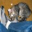
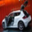
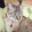

In [60]:
image_test[0:3]['image'].explore()

In [61]:
deep_features_model.predict(image_test[0:3])

dtype: str
Rows: 3
['cat', 'automobile', 'cat']

# Quantitatively Evaluate Deep Features Classifier on Test Data

In [62]:
deep_features_model.evaluate(image_test)

{'accuracy': 0.79025,
 'auc': 0.9392359999999994,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 16
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |  automobile  |       dog       |   10  |
 |     cat      |    automobile   |   17  |
 |     dog      |       bird      |   60  |
 |  automobile  |       cat       |   20  |
 |  automobile  |    automobile   |  953  |
 |     bird     |    automobile   |   13  |
 |     dog      |       cat       |  194  |
 |     bird     |       dog       |   61  |
 |     cat      |       bird      |   88  |
 |  automobile  |       bird      |   17  |
 +--------------+-----------------+-------+
 [16 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.,
 'f1_score': 0.7909071128411668,
 'log_loss': 0.5883743304184752,
 'precisio

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

,SArray
0,

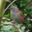

In [72]:
knn_model = turicreate.nearest_neighbors.create(image_test,
                                               features = ['deep_features'],
                                               label = 'id')
animal = image_test[18:19]
animal['image'].explore()

In [73]:
knn_model.query(animal)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.025       | 10.247ms     |

| Done         |         | 100         | 119.472ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,65,0.0,1
0,9750,34.09602642323738,2
0,5419,34.54853689921873,3
0,7605,35.32610057100654,4
0,7797,36.27840973696042,5


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.025       | 9.028ms      |

| Done         |         | 100         | 93.377ms     |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

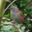
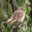
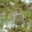
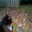
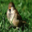

In [109]:
def get_images_from_ids(query_result):
    return image_test.filter_by(query_result['reference_label'],'id')

animal_neighbors = get_images_from_ids(knn_model.query(animal))

animal_neighbors['image'].explore()

# <u>Find Summary Statistics of the Data</u>

In [63]:
sketch=turicreate.Sketch(image_train['label'])
sketch


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  2005 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   4   |    No    |
+------------------+-------+----------+

Most frequent items:
+------------+-------+
|   value    | count |
+------------+-------+
|    cat     |  509  |
|    dog     |  509  |
| automobile |  509  |
|    bird    |  478  |
+------------+-------+


# <u>Create Category-Specific Image Retrieval Models</u>

In [99]:
dog_images=image_train[image_train['label']=='dog']
cat_images=image_train[image_train['label']=='cat']
automobile_images=image_train[image_train['label']=='automobile']
bird_images=image_train[image_train['label']=='bird']

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/turicreate/visualization/_plot.py:461: UserWarning: Displaying only the first 100 rows.
  warnings.warn("Displaying only the first {} rows.".format(maximum_rows))


,id,image,label,deep_features,image_array
0,33,,cat,"[0.5250879526138306, 0.0, 0.0, 0.0, 0.0, 0.0, 9.948286056518555, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0126363039016724, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1646251678466797, 0.0, 0.0, 0.0, 0.0, 0.4600375294685364, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3580564260482788, 0.0, 0.0, 3.517725944519043, 2.9159154891967773, 0.0, 0.0, 0.0, 0.0, 0.4551548957824707, 0.0, 0.0, 0.0, 0.9146482944488525, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8120278716087341, 0.04379773139953613, 0.0, 1.6515014171600342, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3530466556549072, 0.0, 0.0, 1.4851171970367432, 0.0, 0.0, 0.0, 1.5763869285583496, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.6830389499664307, 1.643679141998291, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]","[7.0, 5.0, 8.0, 7.0, 5.0, 8.0, 5.0, 4.0, 6.0, 7.0, 4.0, 7.0, 11.0, 5.0, 9.0, 11.0, 5.0, 9.0, 17.0, 11.0, 15.0, 25.0, 19.0, 23.0, 18.0, 9.0, 17.0, 9.0, 1.0, 9.0, 13.0, 7.0, 15.0, 24.0, 19.0, 27.0, 21.0, 19.0, 25.0, 34.0, 32.0, 35.0, 52.0, 43.0, 42.0, 40.0, 27.0, 26.0, 19.0, 9.0, 10.0, 11.0, 6.0, 10.0, 20.0, 16.0, 18.0, 36.0, 29.0, 28.0, 25.0, 20.0, 22.0, 23.0, 19.0, 22.0, 32.0, 21.0, 22.0, 33.0, 26.0, 29.0, 58.0, 57.0, 61.0, 73.0, 75.0, 81.0, 83.0, 91.0, 94.0, 61.0, 68.0, 66.0, 69.0, 71.0, 66.0, 82.0, 84.0, 78.0, 80.0, 85.0, 81.0, 69.0, 73.0, 68.0, 6.0, 4.0, 8.0, 6.0, ...]"
1,36,,cat,"[0.5660159587860107, 0.0, 0.0, 0.0, 0.0, 0.0, 9.997204780578613, 0.0, 0.0, 0.0, 1.38345205783844, 0.0, 0.7764788269996643, 0.0, 0.0, 0.044802725315093994, 0.22744053602218628, 0.5177360773086548, 0.0, 1.5863749980926514, 0.0, 1.238269329071045, 0.0, 0.6377935409545898, 1.8000781536102295, 1.9250504970550537, 0.06807559728622437, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.452914237976074, 0.7830307483673096, 0.0, 0.0, 0.014504671096801758, 0.0, 0.0, 1.1913495063781738, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.8588502407073975, 0.23833894729614258, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4233408570289612, 0.0, 0.9965428113937378, 2.3011531829833984, 0.0, 0.0, 0.0, 0.0, 0.0, 2.076474189758301, 0.07118624448776245, 0.0, 1.7414445877075195, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3547537922859192, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.167968273162842, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]","[169.0, 122.0, 65.0, 131.0, 108.0, 75.0, 193.0, 196.0, 192.0, 218.0, 221.0, 222.0, 211.0, 215.0, 216.0, 206.0, 214.0, 216.0, 200.0, 211.0, 212.0, 193.0, 206.0, 206.0, 186.0, 201.0, 201.0, 182.0, 197.0, 196.0, 178.0, 192.0, 192.0, 173.0, 187.0, 187.0, 167.0, 182.0, 182.0, 160.0, 175.0, 175.0, 155.0, 169.0, 169.0, 150.0, 164.0, 164.0, 144.0, 158.0, 158.0, 139.0, 153.0, 153.0, 134.0, 148.0, 148.0, 133.0, 144.0, 144.0, 130.0, 140.0, 141.0, 126.0, 136.0, 137.0, 125.0, 136.0, 137.0, 128.0, 138.0, 139.0, 131.0, 141.0, 142.0, 131.0, 144.0, 144.0, 149.0, 163.0, 163.0, 176.0, 194.0, 192.0, 173.0, 192.0, 190.0, 172.0, 187.0, 187.0, 169.0, 183.0, 183.0, 166.0, 181.0, 181.0, 165.0, 119.0, 62.0, 127.0, ...]"
2,159,,cat,"[0.0, 0.0, 0.0, 0.6432753205299377, 0.0, 0.0, 10.177190780639648, 0.0, 0.0, 0.0, 0.0, 0.0, 2.3863513469696045, 0.1998509168624878, 0.0, 0.2907107472419739, 0.7435265779495239, 1.0030467510223389, 1.4652762413024902, 0.0, 0.0, 0.14588844776153564, 0.0, 0.9578428268432617, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3240588903427124, 0.0, 0.0, 0.8844139575958252, 0.0, 0.0, 0.7257575392723083, 1.9903068542480469, 0.0, 0.0, 0.0, 0.0, 0.0, 0.14905840158462524, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4211505055427551, 0.0, 0.0, 0.0, 0.0, 0.3523911237716675, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0920463800430298, 0.0, 0.4573858082294464, 2.408182144165039, 0.0, 0.0, 0.7307713031768799, 0.0, 0.0, 2.664341926574707, 0.1718875765800476, 0.0, 4.22159481048584, 0.0, 0.0, 0.0, 2.915095567703247, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.61897873878479, 0.8255078792572021, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]","[154.0, 145.0, 135.0, 152.0, 144.0, 135.0,
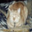
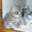
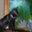
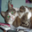
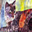
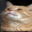
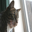
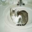
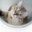
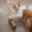
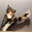
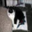
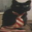
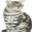
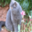
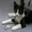
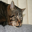
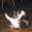
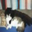
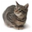
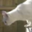
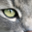
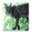
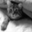
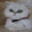
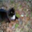
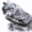
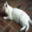
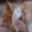
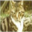
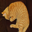
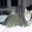
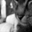
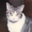
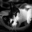
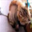
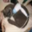
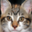
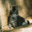
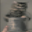
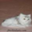
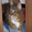
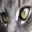
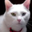
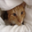
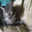
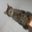
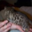
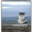
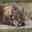
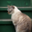
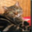
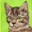
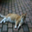
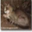
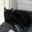
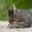
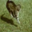
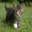
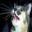
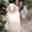
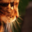
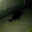
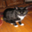
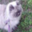
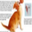
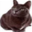
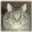
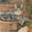
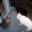
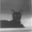
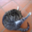
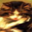
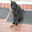
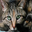
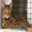
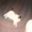
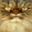
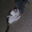
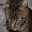
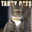
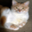
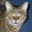
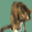
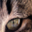
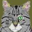
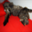
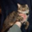
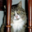
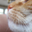
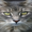
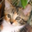
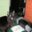
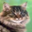
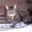
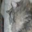
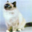
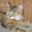
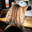
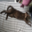

In [100]:
cat_images.explore()

In [101]:
dog_model = turicreate.nearest_neighbors.create(dog_images,features=['deep_features'],label='id')
cat_model = turicreate.nearest_neighbors.create(cat_images,features=['deep_features'],label='id')
automobile_model = turicreate.nearest_neighbors.create(automobile_images,features=['deep_features'],label='id')
bird_model = turicreate.nearest_neighbors.create(bird_images,features=['deep_features'],label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

,SArray
0,

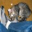

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 7.494ms      |

| Done         |         | 100         | 26.832ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,16289,34.62371920804245,1
0,45646,36.00687992842462,2
0,32139,36.52008134363789,3
0,25713,36.754850252057054,4
0,331,36.87312281675268,5


In [103]:
cat = image_test[0:1]
cat['image'].explore()

cat_model.query(cat)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 14.951ms     |

| Done         |         | 100         | 48.952ms     |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

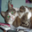
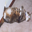
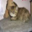
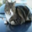
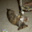

In [106]:
def get_images_from_ids(query_result):
    return cat_images.filter_by(query_result['reference_label'],'id')

cat_neighbors = get_images_from_ids(cat_model.query(cat))
cat_neighbors['image'].explore()

,SArray
0,

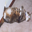

In [120]:
cat_image = image_train[image_train['id']==16289]
cat_image['image'].explore()

,SArray
0,

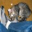

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 2.099ms      |

| Done         |         | 100         | 20.226ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,16976,37.464262878423774,1
0,13387,37.56668321685285,2
0,35867,37.60472670789396,3
0,44603,37.70655851529755,4
0,6094,38.511325490739715,5


In [114]:
dog = image_test[0:1]
dog['image'].explore()

dog_model.query(dog)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 4.793ms      |

| Done         |         | 100         | 22.323ms     |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

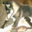
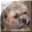
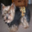
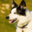
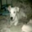

In [115]:
def get_images_from_ids(query_result):
    return dog_images.filter_by(query_result['reference_label'],'id')

dog_neighbors = get_images_from_ids(dog_model.query(cat))
dog_neighbors['image'].explore()

,SArray
0,

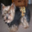

In [119]:
dog_image = image_train[image_train['id']==16976]
dog_image['image'].explore()

# Nearest Neighbor Classification

In [121]:
image_test_dog=image_test[image_test['label']=='dog']
image_test_cat=image_test[image_test['label']=='cat']
image_test_automobile=image_test[image_test['label']=='automobile']
image_test_bird=image_test[image_test['label']=='bird']

In [122]:
cat_model.query(cat)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 9.065ms      |

| Done         |         | 100         | 23.801ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,16289,34.62371920804245,1
0,45646,36.00687992842462,2
0,32139,36.52008134363789,3
0,25713,36.754850252057054,4
0,331,36.87312281675268,5


In [123]:
dog_model.query(dog)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 7.194ms      |

| Done         |         | 100         | 30.401ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,16976,37.464262878423774,1
0,13387,37.56668321685285,2
0,35867,37.60472670789396,3
0,44603,37.70655851529755,4
0,6094,38.511325490739715,5


In [124]:
cat_model.query(cat)['distance'].mean()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 3.484ms      |

| Done         |         | 100         | 26.485ms     |

+--------------+---------+-------------+--------------+

36.15573070978294

In [125]:
dog_model.query(dog)['distance'].mean()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 8.898ms      |

| Done         |         | 100         | 29.204ms     |

+--------------+---------+-------------+--------------+

37.77071136184157

In [127]:
dog_cat_neighbors = cat_model.query(image_test_dog, k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 63000   | 12.3772     | 149.925ms    |

| Done         | 509000  | 100         | 236.264ms    |

+--------------+---------+-------------+--------------+

In [128]:
dog_automobile_neighbors = automobile_model.query(image_test_dog, k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 63000   | 12.3772     | 130.733ms    |

| Done         | 509000  | 100         | 164.356ms    |

+--------------+---------+-------------+--------------+

In [129]:
dog_dog_neighbors = dog_model.query(image_test_dog, k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 63000   | 12.3772     | 208.101ms    |

| Done         | 509000  | 100         | 286.754ms    |

+--------------+---------+-------------+--------------+

In [130]:
dog_bird_neighbors = bird_model.query(image_test_dog, k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 60000   | 12.5523     | 128.071ms    |

| Done         | 478000  | 100         | 167.496ms    |

+--------------+---------+-------------+--------------+

In [135]:
dog_distances = turicreate.SFrame({'dog_automobile': dog_automobile_neighbors['distance'],
                                'dog_cat': dog_cat_neighbors['distance'],
                                'dog_dog': dog_dog_neighbors['distance'],
                                'dog_bird': dog_bird_neighbors['distance']
                               })
dog_distances

dog_automobile,dog_bird,dog_cat,dog_dog
41.95797614571203,41.75386473035126,36.419607706754384,33.47735903726336
46.002133180677895,41.338295892486116,38.83532688735546,32.84584956840558
42.946229069238804,38.61575908528905,36.97634108541545,35.039707318905855
41.6866060048479,37.08922699538219,34.575007291446106,33.90103276968192
39.22696649347584,38.27228869398105,34.778824791016625,37.48492509092561
40.58451176980721,39.146208923590464,35.11715782924591,34.94516534398125
45.10673529610857,40.523040105962316,40.60958309132646,39.09572783446351
41.322114097397666,38.194791839269584,39.90368673062212,37.76961310322033
41.82446549950164,40.15671316613142,38.06747001682115,35.10891446032839
45.49769294011039,45.55979626027668,42.725873295060296,43.242283258453455


In [136]:
def is_dog_correct(row):
    if row['dog_dog']<=min(row.values()):
        return 1
    else:
        return 0

In [137]:
dog_distances.apply(is_dog_correct)

dtype: int
Rows: 1000
[1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, ... ]

In [138]:
dog_distances.apply(is_dog_correct).sum()

678

In [139]:
dog_distances.num_rows()

1000

In [141]:
(dog_distances.apply(is_dog_correct).sum())/(dog_distances.num_rows())*100

67.80000000000001